In [23]:
#importações das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import json

In [ ]:
#importação das planilhas csv para serem dataframes
df100 = pd.read_csv("dataset_sudeste_realista_outliers_100.csv")

In [ ]:
df100.columns.tolist() #listar colunas de tabela de 100 linhas

['id', 'idade', 'renda', 'cidade', 'categoria', 'nota', 'feedback']

In [ ]:
# Tratamento de NaN(nulos) - converter para 0 - tabela de 100 linhas
df100['idade'] = df100['idade'].fillna(0)
df100['renda'] = df100['renda'].fillna(0)
df100['cidade'] = df100['cidade'].fillna(0)
df100['categoria'] = df100['categoria'].fillna(0)
df100['nota'] = df100['nota'].fillna(0)
df100['feedback'] = df100['feedback'].fillna(0)

In [ ]:
#feedbackisualização de tabela tratada de 100 linhas
display(df100.head(100))

,id,idade,renda,cidade,categoria,nota,feedback
0,1,44,22786.63,São Paulo,A,5.9,Bom
1,2,55,31927.19,Belo Horizonte,A,7.2,Bom
2,3,50,36498.17,Vitória,B,7.8,Bom
3,4,43,23199.72,São Paulo,A,7.3,Bom
4,5,50,45807.83,Rio de Janeiro,A,6.3,Bom
...,...,...,...,...,...,...,...
95,96,25,37814.19,Rio de Janeiro,B,9.1,Bom
96,97,56,13147.32,Belo Horizonte,B,9.0,Bom
97,98,82,23620.74,São Paulo,A,9.5,Bom
98,99,18,28822.51,Belo Horizonte,A,8.4,Bom


,id,idade,renda,cidade,categoria,nota,feedback
0,1,58,8170.89,São Paulo,A,8.4,Bom
1,2,41,1574.11,São Paulo,B,6.7,Bom
2,3,79,16745.92,São Paulo,A,6.8,Bom
3,4,79,30742.92,Vitória,A,7.4,Bom
4,5,60,27694.04,Vitória,A,7.1,Bom
...,...,...,...,...,...,...,...
995,996,38,44862.28,Belo Horizonte,A,7.7,Bom
996,997,56,34306.80,Belo Horizonte,B,9.1,Bom
997,998,30,32088.55,Belo Horizonte,B,7.2,Bom
998,999,80,10832.60,Belo Horizonte,A,5.5,Bom


,id,idade,renda,cidade,categoria,nota,feedback
0,1,41,23445.09,Belo Horizonte,B,6.2,Bom
1,2,30,31431.55,Rio de Janeiro,A,9.4,Bom
2,3,78,34981.93,Belo Horizonte,A,6.6,Bom
3,4,52,28385.43,São Paulo,B,5.4,Bom
4,5,19,1748.85,Vitória,B,7.5,Bom
...,...,...,...,...,...,...,...
1995,1996,55,5943.92,Belo Horizonte,A,9.1,Bom
1996,1997,48,3115.57,São Paulo,A,7.0,Bom
1997,1998,20,35574.95,Rio de Janeiro,A,8.8,Bom
1998,1999,35,15450.99,Belo Horizonte,B,6.0,Bom


In [ ]:
# Média, mínimo, máximo, quartis, margem de erro, contagem

print("\n### Descrição Estatística 100###")
print(df100.describe())


### Descrição Estatística 100###
               id       idade        renda        nota
count  100.000000  100.000000    100.00000  100.000000
mean    50.500000   47.990000  25642.74400    7.465000
std     29.011492   19.058387  13582.44882    1.415597
min      1.000000   16.000000   1723.21000    5.000000
25%     25.750000   31.000000  12940.55000    6.275000
50%     50.500000   48.500000  28231.83000    7.500000
75%     75.250000   62.250000  36922.22750    8.725000
max    100.000000   82.000000  46137.87000    9.800000




### Descrição Estatística 1000###
                id        idade         renda         nota
count  1000.000000  1000.000000   1000.000000  1000.000000
mean    500.500000    49.573000  24060.805410     7.406600
std     288.819436    19.385987  13867.493592     1.564149
min       1.000000     8.000000   1025.710000     0.200000
25%     250.750000    33.000000  12293.352500     6.100000
50%     500.500000    50.000000  23762.440000     7.400000
75%     750.250000  

In [ ]:
# Cálculos Estatísticos de idade

media_idade100 = sum(df100['idade'])/len(df100['idade'])
mediana_idade100 = df100['idade'].median()
desvio_padrao_idade100 = df100['idade'].std()
maximo_idade100 = df100['idade'].max()
minimo_idade100 = df100['idade'].min()

print('Média de Idade - 100 Elementos:',round(media_idade100,0))
print('Mediana de Idade - 100 Elementos:',round(mediana_idade100,0))
print('Desvio Padrão de Idade - 100 Elementos:',round(desvio_padrao_idade100,0))
print('Maior Valor de Idade - 100 Elementos:',round(maximo_idade100,0))
print('Menor Valor de Idade - 100 Elementos:',round(minimo_idade100,0))

Média de Idade - 100 Elementos: 48.0
Mediana de Idade - 100 Elementos: 48.0
Desvio Padrão de Idade - 100 Elementos: 19.0
Maior Valor de Idade - 100 Elementos: 82
Menor Valor de Idade - 100 Elementos: 16


Média de Idade - 1000 Elementos: 50.0
Mediana de Idade - 1000 Elementos: 50.0
Desvio Padrão de Idade - 1000 Elementos: 19.0
Maior Valor de Idade - 1000 Elementos: 114
Menor Valor de Idade - 1000 Elementos: 8


Média de Idade - 2000 Elementos: 50.0
Mediana de Idade - 2000 Elementos: 50.0
Desvio Padrão de Idade - 2000 Elementos: 19.0
Maior Valor de Idade - 2000 Elementos: 113
Menor Valor de Idade - 2000 Elementos: 1




In [ ]:
# Cálculos Estatísticos de renda

media_renda100 = sum(df100['renda'])/len(df100['renda'])
mediana_renda100 = df100['renda'].median()
desvio_padrao_renda100 = df100['renda'].std()
maximo_renda100 = df100['renda'].max()
minimo_renda100 = df100['renda'].min()

print('Média de Renda - 100 Elementos:',round(media_renda100,2))
print('Mediana de Renda - 100 Elementos:',round(mediana_renda100,2))
print('Desvio Padrão de Renda - 100 Elementos:',round(desvio_padrao_renda100,2))
print('Maior Valor de Renda - 100 Elementos:',round(maximo_renda100,2))
print('Menor Valor de Renda - 100 Elementos:',round(minimo_renda100,2))

Média de Renda - 100 Elementos: 25642.74
Mediana de Renda - 100 Elementos: 28231.83
Desvio Padrão de Renda - 100 Elementos: 13582.45
Maior Valor de Renda - 100 Elementos: 46137.87
Menor Valor de Renda - 100 Elementos: 1723.21


Média de Renda - 1000 Elementos: 24060.81
Mediana de Renda - 1000 Elementos: 23762.44
Desvio Padrão de Renda - 1000 Elementos: 13867.49
Maior Valor de Renda - 1000 Elementos: 91421.57
Menor Valor de Renda - 1000 Elementos: 1025.71


Média de Renda - 2000 Elementos: 23973.86
Mediana de Renda - 2000 Elementos: 23837.94
Desvio Padrão de Renda - 2000 Elementos: 13566.05
Maior Valor de Renda - 2000 Elementos: 91696.75
Menor Valor de Renda - 2000 Elementos: 545.75




In [ ]:
# Cálculos Estatísticos de nota

media_nota100 = sum(df100['nota'])/len(df100['nota'])
mediana_nota100 = df100['nota'].median()
desvio_padrao_nota100 = df100['nota'].std()
maximo_nota100 = df100['nota'].max()
minimo_nota100 = df100['nota'].min()

print('Média de Nota - 100 Elementos:',round(media_nota100,2))
print('Mediana de Nota - 100 Elementos:',round(mediana_nota100,2))
print('Desvio Padrão de Nota - 100 Elementos:',round(desvio_padrao_nota100,2))
print('Maior Valor de Nota - 100 Elementos:',round(maximo_nota100,2))
print('Menor Valor de Nota - 100 Elementos:',round(minimo_nota100,2))

Média de Nota - 100 Elementos: 7.46
Mediana de Nota - 100 Elementos: 7.5
Desvio Padrão de Nota - 100 Elementos: 1.42
Maior Valor de Nota - 100 Elementos: 9.8
Menor Valor de Nota - 100 Elementos: 5.0


Média de Nota - 1000 Elementos: 7.41
Mediana de Nota - 1000 Elementos: 7.4
Desvio Padrão de Nota - 1000 Elementos: 1.56
Maior Valor de Nota - 1000 Elementos: 10.0
Menor Valor de Nota - 1000 Elementos: 0.2


Média de Nota - 2000 Elementos: 7.43
Mediana de Nota - 2000 Elementos: 7.4
Desvio Padrão de Nota - 2000 Elementos: 1.5
Maior Valor de Nota - 2000 Elementos: 10.0
Menor Valor de Nota - 2000 Elementos: 0.7




In [ ]:
#Calculando o IQR e identificando os limites - Renda

Q1_renda100 = df100['renda'].quantile(0.25)
Q3_renda100 = df100['renda'].quantile(0.75)
IQR_renda100 = Q3_renda100 - Q1_renda100
limite_inferior_renda100 = Q1_renda100 - 1.5 * IQR_renda100
limite_superior_renda100 = Q3_renda100 + 1.5 * IQR_renda100

print (f"\n\n\t IQR - Campo Renda - 100\n\n")
print(f"Quartis -> Q1: {Q1_renda100:-8.2f}  ->  Q3: {Q3_renda100:-8.2f}")
print(f"IQR ----- {IQR_renda100}")
print(f"Limites - Inf: {limite_inferior_renda100:-8.2f}  -> Sup: {limite_superior_renda100:-8.2f}")



	 IQR - Campo Renda - 100


Quartis -> Q1: 12940.55  ->  Q3: 36922.23
IQR ----- 23981.6775
Limites - Inf: -23031.97  -> Sup: 72894.74





	 IQR - Campo Renda - 1000


Quartis -> Q1: 12293.35  ->  Q3: 35709.88
IQR ----- 23416.53
Limites - Inf: -22831.44  -> Sup: 70834.68





	 IQR - Campo Renda - 2000


Quartis -> Q1: 12293.80  ->  Q3: 35400.43
IQR ----- 23106.627500000002
Limites - Inf: -22366.14  -> Sup: 70060.37





In [ ]:
#Calculando o IQR e identificando os limites - Idade

Q1_idade100 = df100['idade'].quantile(0.25)
Q3_idade100 = df100['idade'].quantile(0.75)
IQR_idade100 = Q3_idade100 - Q1_idade100
limite_inferior_idade100 = Q1_idade100 - 1.5 * IQR_idade100
limite_superior_idade100 = Q3_idade100 + 1.5 * IQR_idade100

print (f"\n\n\t IQR - Campo Idade - 100\n\n")
print(f"Quartis -> Q1: {Q1_idade100:-8.2f}  ->  Q3: {Q3_idade100:-8.2f}")
print(f"IQR ----- {IQR_idade100}")
print(f"Limites - Inf: {limite_inferior_idade100:-8.2f}  -> Sup: {limite_superior_idade100:-8.2f}")



	 IQR - Campo Idade - 100


Quartis -> Q1:    31.00  ->  Q3:    62.25
IQR ----- 31.25
Limites - Inf:   -15.88  -> Sup:   109.12





	 IQR - Campo Idade - 1000


Quartis -> Q1:    33.00  ->  Q3:    66.00
IQR ----- 33.0
Limites - Inf:   -16.50  -> Sup:   115.50





	 IQR - Campo Idade - 2000


Quartis -> Q1:    34.00  ->  Q3:    66.00
IQR ----- 32.0
Limites - Inf:   -14.00  -> Sup:   114.00





In [ ]:
#Calculando o IQR e identificando os limites - Nota

Q1_nota100 = df100['nota'].quantile(0.25)
Q3_nota100 = df100['nota'].quantile(0.75)
IQR_nota100 = Q3_nota100 - Q1_nota100
limite_inferior_nota100 = Q1_nota100 - 1.5 * IQR_nota100
limite_superior_nota100 = Q3_nota100 + 1.5 * IQR_nota100

print (f"\n\n\t IQR - Campo Nota - 100\n\n")
print(f"Quartis -> Q1: {Q1_nota100:-8.2f}  ->  Q3: {Q3_nota100:-8.2f}")
print(f"IQR ----- {IQR_nota100}")
print(f"Limites - Inf: {limite_inferior_nota100:-8.2f}  -> Sup: {limite_superior_nota100:-8.2f}")



	 IQR - Campo Nota - 100


Quartis -> Q1:     6.28  ->  Q3:     8.72
IQR ----- 2.4499999999999993
Limites - Inf:     2.60  -> Sup:    12.40





	 IQR - Campo Nota - 1000


Quartis -> Q1:     6.10  ->  Q3:     8.70
IQR ----- 2.5999999999999996
Limites - Inf:     2.20  -> Sup:    12.60





	 IQR - Campo Nota - 2000


Quartis -> Q1:     6.20  ->  Q3:     8.70
IQR ----- 2.499999999999999
Limites - Inf:     2.45  -> Sup:    12.45





In [ ]:
#Outliers Renda

outliers_renda100 = df100[(df100['renda'] < limite_inferior_renda100) | (df100['renda'] > limite_superior_renda100)]
print(f"\n### Possíveis Outliers em 'renda' - 100 Elementos###\n\n{outliers_renda100}\n\n\n")


### Possíveis Outliers em 'renda' - 100 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []




### Possíveis Outliers em 'renda' - 1000 Elementos###

      id  idade     renda          cidade categoria  nota feedback
235  236    113  87936.05  Belo Horizonte         B   2.0      Bom
251  252     95  89393.75         Vitória         A   4.3      Bom
494  495     15  90902.54         Vitória         A   4.2      Bom
886  887     85  91421.57  Rio de Janeiro         A   1.0      Bom
964  965     84  87218.18         Vitória         A   2.2      Bom




### Possíveis Outliers em 'renda' - 2000 Elementos###

        id  idade     renda          cidade categoria  nota feedback
83      84     91  89175.69  Belo Horizonte         B   2.4      Bom
375    376      7  77505.90  Rio de Janeiro         B   4.9      Bom
826    827     86  72759.46       São Paulo         B   3.8      Bom
829    830     94  91696.75  Rio de Janeiro         A   1.2 

In [ ]:
#Outliers Idade

outliers_idade100 = df100[(df100['idade'] < limite_inferior_idade100) | (df100['idade'] > limite_superior_idade100)]
print(f"\n### Possíveis Outliers em 'idade' - 100 Elementos###\n\n{outliers_idade100}\n\n\n")


### Possíveis Outliers em 'idade' - 100 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []




### Possíveis Outliers em 'idade' - 1000 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []




### Possíveis Outliers em 'idade' - 2000 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []





In [ ]:
#Outliers Nota

outliers_nota100 = df100[(df100['nota'] < limite_inferior_nota100) | (df100['nota'] > limite_superior_nota100)]
print(f"\n### Possíveis Outliers em 'nota' - 100 Elementos###\n\n{outliers_nota100}\n\n\n")


### Possíveis Outliers em 'nota' - 100 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []




### Possíveis Outliers em 'nota' - 1000 Elementos###

      id  idade     renda          cidade categoria  nota feedback
235  236    113  87936.05  Belo Horizonte         B   2.0      Bom
310  311    114   1025.71  Belo Horizonte         A   1.7      Bom
861  862    113   1457.17  Rio de Janeiro         A   0.9      Bom
886  887     85  91421.57  Rio de Janeiro         A   1.0      Bom
917  918     95   1199.20         Vitória         B   0.2      Bom




### Possíveis Outliers em 'nota' - 2000 Elementos###

        id  idade     renda          cidade categoria  nota feedback
7        8      3   1096.26         Vitória         A   0.7      Bom
83      84     91  89175.69  Belo Horizonte         B   2.4      Bom
95      96     93   1291.11         Vitória         A   1.2      Bom
179    180      8    870.31         Vitória         B   1.7    

In [ ]:
#Conversão da planilha tratada para csv
df100.to_csv('Relacionado100_Tratado.csv', index=False)

In [39]:
# Converter para lista de dicionários (documentos MongoDB)
dados_mongo100 = df100.to_dict(orient='records')

# Salvar como JSON
with open('dados_mongo_Relacionado100.json', 'w', encoding='utf-8') as f:
    json.dump(dados_mongo100, f, ensure_ascii=False, indent=2)

print("Arquivo salvo com sucesso para importação no MongoDB Atlas - 100 linhas!")

Arquivo salvo com sucesso para importação no MongoDB Atlas - 100 linhas!


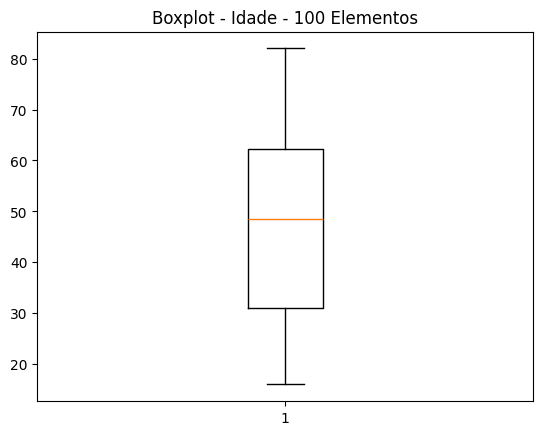

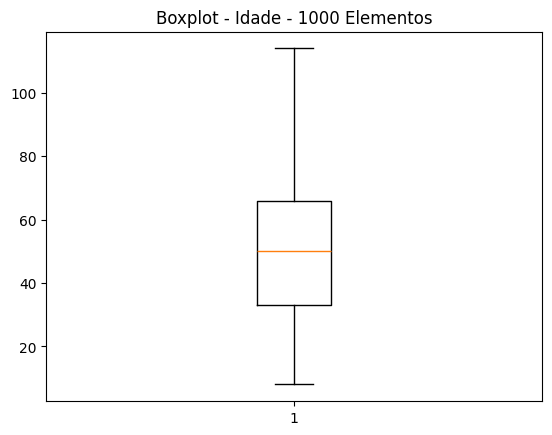

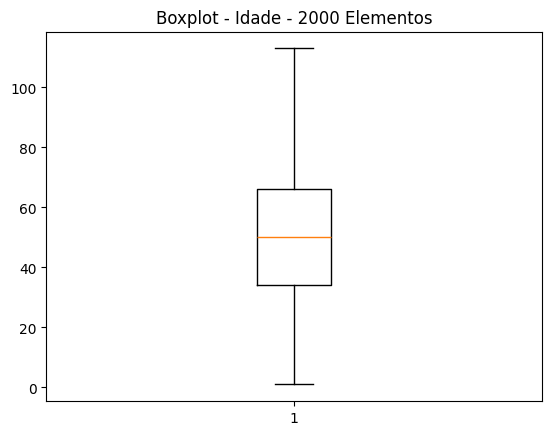

In [ ]:
#Geração Gráfico - Idade - 100 linhas
plt.boxplot(df100['idade'])
plt.title("Boxplot - Idade - 100 Elementos")
plt.show()

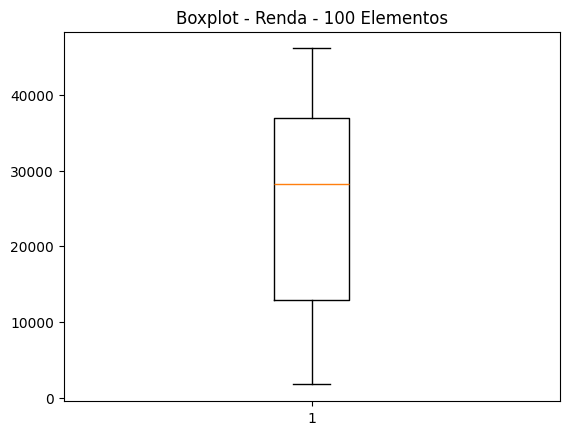

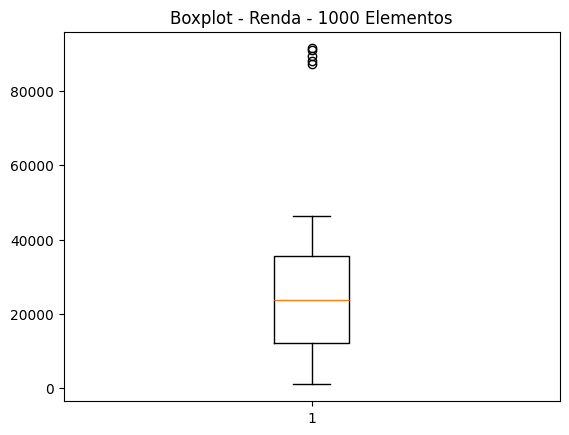

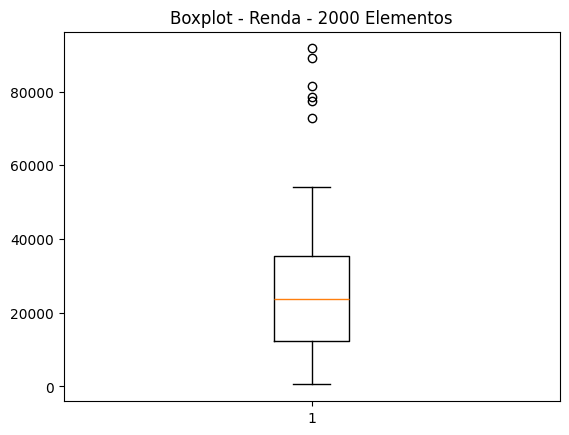

In [ ]:
#Geração Gráfico - Renda - 100 linhas
plt.boxplot(df100['renda'])
plt.title("Boxplot - Renda - 100 Elementos")
plt.show()

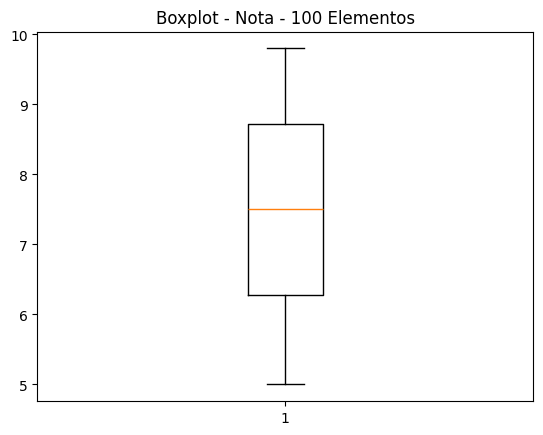

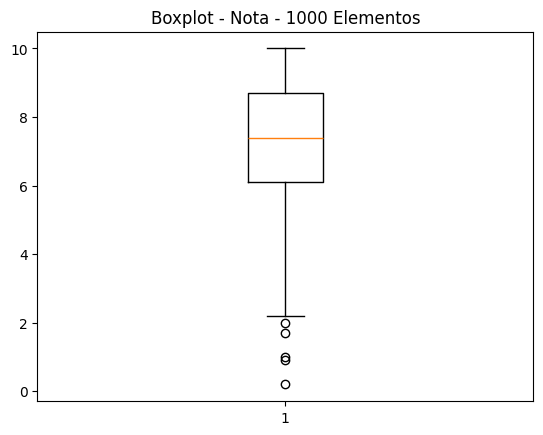

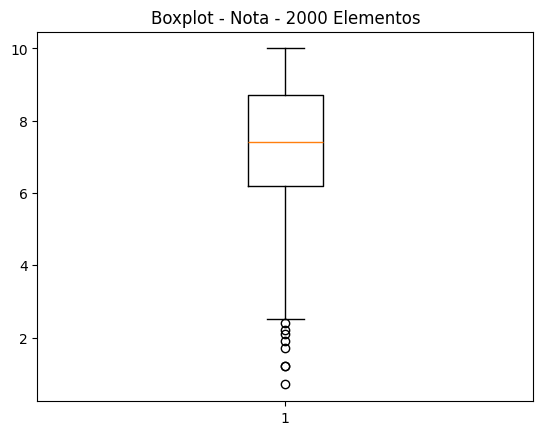

In [ ]:
#Geração Gráfico - Nota - 100 linhas
plt.boxplot(df100['nota'])
plt.title("Boxplot - Nota - 100 Elementos")
plt.show()